In [4]:
from model import CVAE
from model import ModelTrainer
import scanpy as sc
from torchsummary import summary

## loading and preparing data 

In [5]:
adata = sc.read("./data/kang_count.h5ad")
sc.pp.normalize_per_cell(adata)
sc.pp.log1p(adata)
sc.pp.filter_genes_dispersion(adata)
sc.pp.highly_variable_genes(adata, n_top_genes=1000)
adata_fil = adata[:, adata.var['highly_variable']]
n_conditions = adata.obs["condition"].unique().shape[0]

In [8]:
sc.pp.neighbors(adata_fil)
sc.tl.umap(adata_fil)


         Falling back to preprocessing with `sc.pp.pca` and default params.


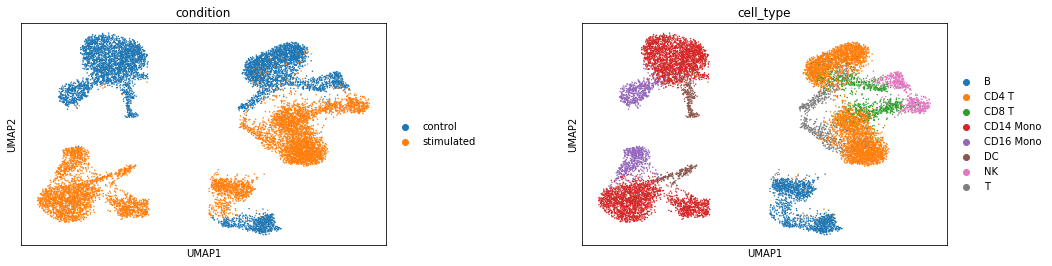

In [9]:
sc.pl.umap(adata_fil, color=["condition", "cell_type"], wspace=.4)

## creating model object 

In [6]:
model = CVAE(adata_fil.n_vars, n_conditions,
             encoder_layer_sizes=[128], decoder_layer_sizes=[128], latent_dim=10, alpha=0.0001)

### Make a trainer object 

In [11]:
trainer = modelTrainer(model, adata_fil)

In [12]:
trainer.train(100,124)

Epoch 00/100 Batch 0000/93, Loss:  241.2475, rec_loss:  241.2473, KL_loss:    0.0002
Epoch 00/100 Batch 0093/93, Loss:   70.5717, rec_loss:   70.5687, KL_loss:    0.0030
Epoch 01/100 Batch 0000/93, Loss:   66.1008, rec_loss:   66.0982, KL_loss:    0.0026
Epoch 01/100 Batch 0093/93, Loss:   63.6216, rec_loss:   63.6179, KL_loss:    0.0037
Epoch 02/100 Batch 0000/93, Loss:   55.5632, rec_loss:   55.5596, KL_loss:    0.0037
Epoch 02/100 Batch 0093/93, Loss:   57.2971, rec_loss:   57.2925, KL_loss:    0.0047
Epoch 03/100 Batch 0000/93, Loss:   53.8790, rec_loss:   53.8749, KL_loss:    0.0042
Epoch 03/100 Batch 0093/93, Loss:   60.5532, rec_loss:   60.5484, KL_loss:    0.0049
Epoch 04/100 Batch 0000/93, Loss:   53.3656, rec_loss:   53.3610, KL_loss:    0.0046
Epoch 04/100 Batch 0093/93, Loss:   60.5447, rec_loss:   60.5395, KL_loss:    0.0052
Epoch 05/100 Batch 0000/93, Loss:   50.1771, rec_loss:   50.1720, KL_loss:    0.0051
Epoch 05/100 Batch 0093/93, Loss:   59.1057, rec_loss:   59.1007,

Epoch 44/100 Batch 0093/93, Loss:   59.8950, rec_loss:   59.8883, KL_loss:    0.0067
Epoch 45/100 Batch 0000/93, Loss:   46.1237, rec_loss:   46.1163, KL_loss:    0.0074
Epoch 45/100 Batch 0093/93, Loss:   53.1140, rec_loss:   53.1065, KL_loss:    0.0075
Epoch 45, Loss_valid:   45.9615, rec_loss_valid:   45.9537, KL_loss_valid:    0.0078
Epoch 46/100 Batch 0000/93, Loss:   48.5903, rec_loss:   48.5833, KL_loss:    0.0070
Epoch 46/100 Batch 0093/93, Loss:   52.2316, rec_loss:   52.2240, KL_loss:    0.0076
Epoch 47/100 Batch 0000/93, Loss:   44.1671, rec_loss:   44.1595, KL_loss:    0.0076
Epoch 47/100 Batch 0093/93, Loss:   49.7295, rec_loss:   49.7230, KL_loss:    0.0065
Epoch 48/100 Batch 0000/93, Loss:   44.3132, rec_loss:   44.3057, KL_loss:    0.0075
Epoch 48/100 Batch 0093/93, Loss:   48.8294, rec_loss:   48.8212, KL_loss:    0.0082
Epoch 49/100 Batch 0000/93, Loss:   44.6369, rec_loss:   44.6294, KL_loss:    0.0075
Epoch 49/100 Batch 0093/93, Loss:   50.5727, rec_loss:   50.5649,

Epoch 88/100 Batch 0093/93, Loss:   59.9132, rec_loss:   59.9050, KL_loss:    0.0082
Epoch 89/100 Batch 0000/93, Loss:   48.1527, rec_loss:   48.1443, KL_loss:    0.0084
Epoch 89/100 Batch 0093/93, Loss:   47.2541, rec_loss:   47.2457, KL_loss:    0.0084
Epoch 90/100 Batch 0000/93, Loss:   45.5358, rec_loss:   45.5271, KL_loss:    0.0086
Epoch 90/100 Batch 0093/93, Loss:   45.8379, rec_loss:   45.8296, KL_loss:    0.0083
Epoch 90, Loss_valid:   45.9490, rec_loss_valid:   45.9401, KL_loss_valid:    0.0089
Epoch 91/100 Batch 0000/93, Loss:   45.9948, rec_loss:   45.9864, KL_loss:    0.0084
Epoch 91/100 Batch 0093/93, Loss:   56.5008, rec_loss:   56.4925, KL_loss:    0.0083
Epoch 92/100 Batch 0000/93, Loss:   44.8199, rec_loss:   44.8113, KL_loss:    0.0086
Epoch 92/100 Batch 0093/93, Loss:   61.4457, rec_loss:   61.4361, KL_loss:    0.0096
Epoch 93/100 Batch 0000/93, Loss:   45.0832, rec_loss:   45.0748, KL_loss:    0.0084
Epoch 93/100 Batch 0093/93, Loss:   41.6155, rec_loss:   41.6060,

## visualizing the latent  space

... storing 'cell_type' as categorical
... storing 'condition' as categorical


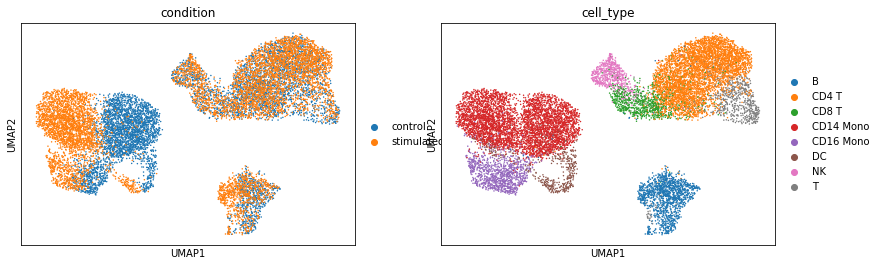

In [14]:
data = model.get_latent(adata_fil.X, model.label_encoder.transform(adata.obs["condition"]))
adata_latent = sc.AnnData(data)
adata_latent.obs["cell_type"] = adata.obs["cell_type"].tolist()
adata_latent.obs["condition"] = adata.obs["condition"].tolist()
sc.pp.neighbors(adata_latent)
sc.tl.umap(adata_latent)

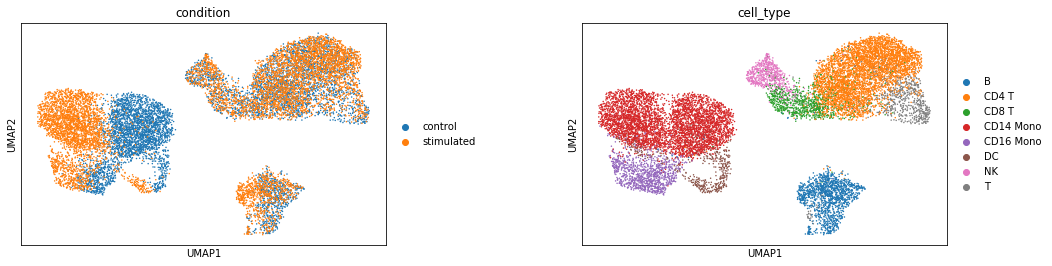

In [15]:
sc.pl.umap(adata_latent, color=["condition", "cell_type"], wspace=.4)

## training a VAE instead of CVAE by not passing conditions

In [16]:
model = CVAE(adata_fil.n_vars,
             encoder_layer_sizes=[128], decoder_layer_sizes=[128], latent_dim=10, alpha=0.0001)

In [17]:
trainer = modelTrainer(model, adata_fil)

In [18]:
trainer.train(100,124,early_patience=5)

Epoch 00/100 Batch 0000/93, Loss:  241.3284, rec_loss:  241.3282, KL_loss:    0.0001
Epoch 00/100 Batch 0093/93, Loss:   79.8218, rec_loss:   79.8192, KL_loss:    0.0027
Epoch 01/100 Batch 0000/93, Loss:   60.6450, rec_loss:   60.6421, KL_loss:    0.0029
Epoch 01/100 Batch 0093/93, Loss:   50.9550, rec_loss:   50.9510, KL_loss:    0.0039
Epoch 02/100 Batch 0000/93, Loss:   58.4807, rec_loss:   58.4767, KL_loss:    0.0040
Epoch 02/100 Batch 0093/93, Loss:   69.8557, rec_loss:   69.8508, KL_loss:    0.0049
Epoch 03/100 Batch 0000/93, Loss:   51.2423, rec_loss:   51.2374, KL_loss:    0.0049
Epoch 03/100 Batch 0093/93, Loss:   53.6749, rec_loss:   53.6698, KL_loss:    0.0051
Epoch 04/100 Batch 0000/93, Loss:   50.5541, rec_loss:   50.5489, KL_loss:    0.0052
Epoch 04/100 Batch 0093/93, Loss:   50.3462, rec_loss:   50.3407, KL_loss:    0.0055
Epoch 05/100 Batch 0000/93, Loss:   51.0569, rec_loss:   51.0515, KL_loss:    0.0054
Epoch 05/100 Batch 0093/93, Loss:   49.8137, rec_loss:   49.8077,

Epoch 44/100 Batch 0093/93, Loss:   51.3512, rec_loss:   51.3428, KL_loss:    0.0083
Epoch 45/100 Batch 0000/93, Loss:   43.7515, rec_loss:   43.7433, KL_loss:    0.0081
Epoch 45/100 Batch 0093/93, Loss:   58.2548, rec_loss:   58.2462, KL_loss:    0.0086
Epoch 45, Loss_valid:   46.1417, rec_loss_valid:   46.1335, KL_loss_valid:    0.0083
Epoch 46/100 Batch 0000/93, Loss:   44.6117, rec_loss:   44.6038, KL_loss:    0.0080
Epoch 46/100 Batch 0093/93, Loss:   49.3329, rec_loss:   49.3242, KL_loss:    0.0088
Epoch 47/100 Batch 0000/93, Loss:   44.4104, rec_loss:   44.4022, KL_loss:    0.0082
Epoch 47/100 Batch 0093/93, Loss:   44.2320, rec_loss:   44.2245, KL_loss:    0.0075
Epoch 48/100 Batch 0000/93, Loss:   44.6924, rec_loss:   44.6840, KL_loss:    0.0084
Epoch 48/100 Batch 0093/93, Loss:   49.8532, rec_loss:   49.8440, KL_loss:    0.0092
Training stoped with early stopping
